<a href="https://colab.research.google.com/github/bondpy202212/AI_projects/blob/main/9___NLP_the_Sarcasm_Dataset(Kaggle_News_Headlines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [1]:
import io
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import IFrame
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Download and inspect the dataset**\
https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection

In [ ]:
!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection -q

!unzip news-headlines-dataset-for-sarcasm-detection.zip

In [3]:
# Load the JSON file
with open("./Sarcasm_Headlines_Dataset.json", 'r') as f:
   datastore = [json.loads(line) for line in f]

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

print(f'Size dataset Sarcasm: {len(labels)}')

Size dataset Sarcasm: 26709


**Hyperparameters**

In [4]:
# Number of examples to use for training
training_size = round(0.9 * len(labels))

# Vocabulary size of the tokenizer
vocab_size = 1000

# Maximum length of the padded sequences
max_length = 32

# Output dimensions of the Embedding layer
embedding_dim = 16

**Split the dataset**

In [5]:
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

**Preprocessing the train and test sets**

In [6]:
# Parameters for padding and OOV tokens
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,
                               maxlen=max_length,
                               padding=padding_type,
                               truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

**Build and Compile the Model**

In [7]:
# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[ [10,2],[1,3],[1,1] ]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4. 2.]]


In [8]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Calculating model parameters without compilation and training
model.build(input_shape=(None, None))

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, None, 16)            │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,217 (63.35 KB)

 Trainable params: 16,217 (63.35 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Train the Model**

In [10]:
num_epochs = 30

# Train the model
history = model.fit(training_padded,
                    training_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels),
                    verbose=1)

Epoch 1/30
752/752 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6134 - loss: 0.6470 - val_accuracy: 0.7735 - val_loss: 0.4687
Epoch 2/30
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7998 - loss: 0.4323 - val_accuracy: 0.8034 - val_loss: 0.4189
Epoch 3/30
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8256 - loss: 0.3835 - val_accuracy: 0.8031 - val_loss: 0.4190
Epoch 4/30
752/752 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8228 - loss: 0.3839 - val_accuracy: 0.8121 - val_loss: 0.3965
Epoch 5/30
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8344 - loss: 0.3636 - val_accuracy: 0.8061 - val_loss: 0.4034
Epoch 6/30
752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8348 - loss: 0.3582 - val_accuracy: 0.8083 - val_loss: 0.4084
Epoch 7/30
752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8319 - loss: 0.3647 - val_accuracy: 0.8113 - val_loss: 0.4050
Epoch 8/30
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8385 - loss: 0.3536 - val_accuracy: 0.

**Visualize the Results**

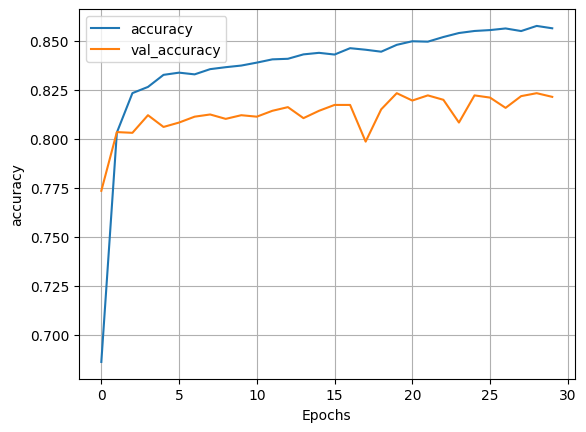

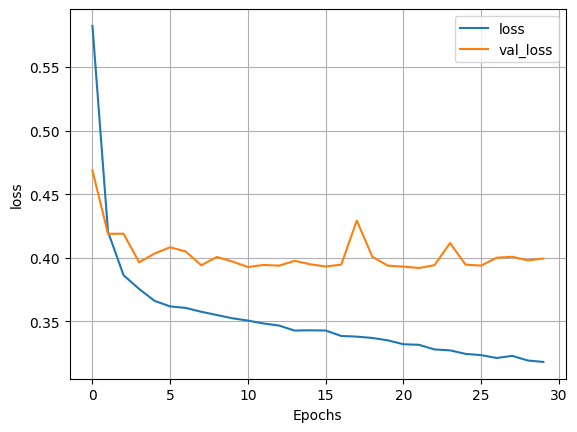

In [11]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.grid(True)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

**Visualizing 3D Vectors**\
visualize the vectors associated with each word in the training set in a 3D space

In [12]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape)

(1000, 16)


**Generated Word Embeddings data files**

In [13]:
# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

**Saved files on PC**

In [14]:
# Import files utilities in Colab
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Opening the site https://projector.tensorflow.org/, for visualization of word embeddings.**

In [15]:
IFrame('https://projector.tensorflow.org/', width=1000, height=600)

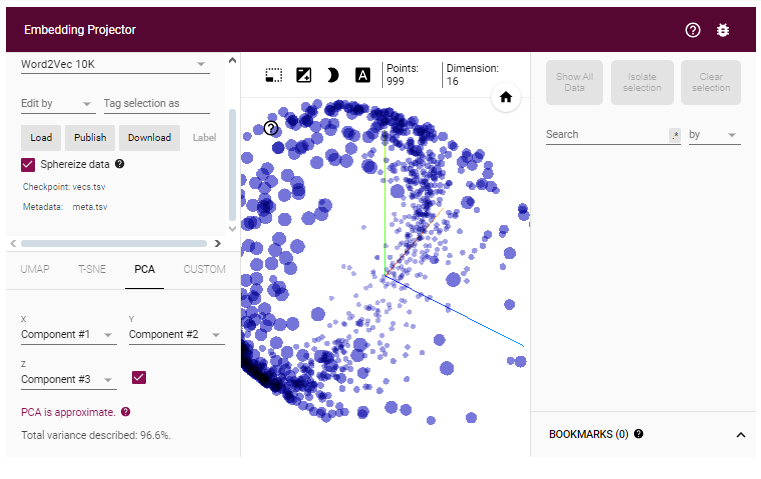